In [ ]:
import warnings

import matplotlib.pyplot as plt
import numpy as np


warnings.filterwarnings("ignore")


def complex_matrix(xmin, xmax, ymin, ymax, pixel_density) -> np.ndarray:
    """To generate a matrix of complex numbers

    input:
        `xmin`: minimum value of the real part
        `xmax`: maximum value of the real part
        `ymin`: minimum value of the imaginary part
        `ymax`: maximum value of the imaginary part
        `pixel_density`: number of pixels per unit length

    output:
        return a matrix of complex numbers
    """
    re = np.linspace(xmin, xmax, int((xmax - xmin) * pixel_density))
    im = np.linspace(ymin, ymax, int((ymax - ymin) * pixel_density))

    return re[np.newaxis, :] + im[:, np.newaxis] * 1j


def is_stable(c: np.complex64, num_iterations):
    """To check if a complex number c is stable under the iteration

    input:
        `c`: a complex number
        `num_iterations`: number of iterations

    output:
        True if c is stable, False otherwise
    """
    z = 0
    for _ in range(num_iterations):
        z = z**2 + c
    return abs(z) <= 2


def get_members(c, num_iterations):
    """To get the members of the Mandelbrot set

    input:
        `c`: a matrix of complex numbers
        `num_iterations`: number of iterations

    output:
        return a matrix of complex numbers that are members of the Mandelbrot set
    """
    mask = is_stable(c, num_iterations)
    return c[mask]

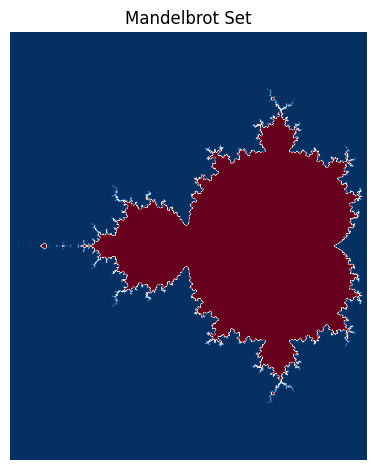

In [ ]:
# calculate the Mandelbrot Set
c = complex_matrix(-2, 0.5, -1.5, 1.5, pixel_density=512)
members = get_members(c, num_iterations=20)

# plot the Mandelbrot Set
fig, ax = plt.subplots()
ax.set_title("Mandelbrot Set")
ax.set_aspect("equal")
ax.axis("off")
ax.imshow(is_stable(c, num_iterations=20), cmap="RdBu_r")

plt.tight_layout()
plt.show()

In [ ]:
def Mandelbrot(xmin, xmax, ymin, ymax, xn, yn, itermax, horizon=2.0):
    """Generate the Mandelbrot set

    input:
        `xmin`: minimum value of real axis
        `xmax`: maximum value of real axis
        `ymin`: minimum value of imaginary axis
        `ymax`: maximum value of imaginary axis
        `xn`: number of points along real axis
        `yn`: number of points along imaginary axis
        `itermax`: number of iterations
        `horizon`: cutoff value for sequence, default 2.0

    output:
        `Z_.T`: 2D array of final Z values
        `N_.T`: 2D array of iteration counts
    """
    # Create grid of points in complex plane
    Xi, Yi = np.meshgrid(np.arange(xn), np.arange(yn), indexing="ij")
    Xi = Xi.astype(np.uint32)
    Yi = Yi.astype(np.uint32)

    # Create complex plane
    X = np.linspace(xmin, xmax, xn, dtype=np.float32)[Xi]  # create 2D array of x-coordinates
    Y = np.linspace(ymin, ymax, yn, dtype=np.float32)[Yi]  # 2D array of y-coordinates
    C = X + Y * 1j  # 2D array of complex numbers

    N_ = np.zeros_like(C, dtype=np.uint32)
    Z_ = np.zeros_like(C, dtype=np.complex64)
    # Xi.shape = Yi.shape = C.shape = Z_.shape = N_.shape = (yn, xn)

    Z = np.zeros_like(C, dtype=np.complex64)

    for i in range(itermax):
        if not len(Z):
            break

        # Compute for relevant points only
        np.multiply(Z, Z, Z)  # Z = Z * Z
        np.add(Z, C, Z)  # Z = Z + C

        # Failed convergence
        I = abs(Z) > horizon  # find diverged points
        N_[Xi[I], Yi[I]] = i + 1  # store iteration count
        Z_[Xi[I], Yi[I]] = Z[I]  # store final Z value

        # Keep going with those who have not diverged yet
        I = np.logical_not(I)  # I = -I
        Z = Z[I]
        Xi, Yi = Xi[I], Yi[I]
        C = C[I]
    return Z_.T, N_.T  # transpose to have correct orientation

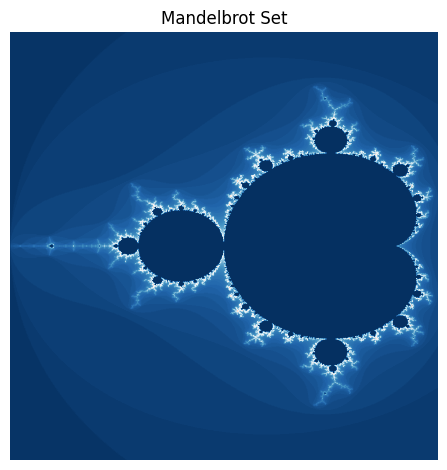

In [ ]:
Zdata, Ndata = Mandelbrot(-2.0, 0.5, -1.5, 1.5, 1024, 1024, 100)

# plot
fig, ax = plt.subplots()
ax.set_title("Mandelbrot Set")
ax.set_aspect("equal")
ax.axis("off")
ax.imshow(Ndata, cmap="RdBu_r")

plt.tight_layout()
plt.show()